# 01 Fundamentals of Probability Theory
*This notebook illustrates methods to implement tasks using the probability theory*
***
Alessandro Tufano, Ph.D. 2021

### Import Packages

In [1]:
import numpy as np
from scipy.stats import norm
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

### Generate random data
A data sample is randomly generated by using a normal distribution.

Text(0.5, 1.0, 'Empirical Gaussian Observations')

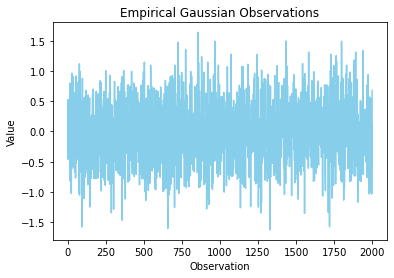

In [2]:
#Generation of random data normally distributed
mean = 0
sigma = .5
data = np.random.normal(mean, sigma, size=2000)

# Plot the sample data
plt.plot(data, color='skyblue')
plt.xlabel("Observation")
plt.ylabel("Value")
plt.title("Empirical Gaussian Observations")

Text(0.5, 1.0, 'Cumulative Distribution Function - empirical data')

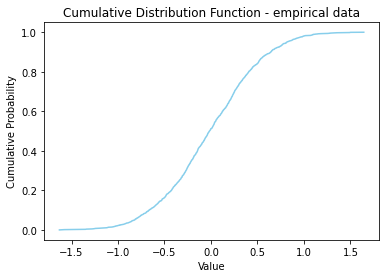

In [3]:
#Definition of the empirical CDF
ecdf = ECDF(data)

# Plot the cumulative distribution
plt.plot(ecdf.x, ecdf.y, color='skyblue')
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function - empirical data")

Text(0.5, 1.0, 'Empirical Histogram of the observations')

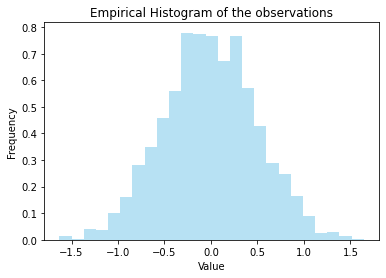

In [4]:
#plot the histogram of the empirical data (probability density function)
n, bins, patches =plt.hist(data, bins=25, density=True, alpha=0.6, color='skyblue')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Empirical Histogram of the observations")

### Fit empirical data to normal distribution

In [5]:
#data fitting to a normal distribution
mu, std = norm.fit(data)
print(f"Best fit with a normal distribution having mu={np.round(mu, 2):.3f}, sigma={np.round(std, 2):.3f} ")



Best fit with a normal distribution having mu=-0.010, sigma=0.500 


Text(0.5, 1.0, 'Gaussian Fit PDF: mu = -0.01,  std = 0.50')

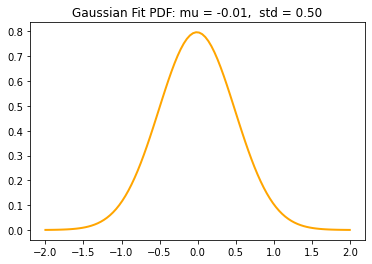

In [6]:
# Plot the best-fit PDF.
x = np.linspace(-2, 2, 100)
y = norm.pdf(x, mu, std)
plt.plot(x, y, 'orange', linewidth=2)
plt.title("Gaussian Fit PDF: mu = %.2f,  std = %.2f" % (mu, std))

The cumulative function of the normal probability distribution is obtained by applying $\frac{1}{\sqrt{2 \pi} \sigma}e^{\frac{-1}{2}(\frac{x-\mu}{\sigma})^2}$

Text(0.5, 1.0, 'Gaussian Fit CDF: mu = -0.01,  std = 0.50')

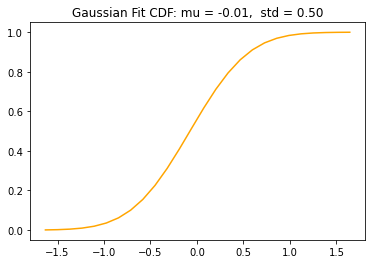

In [7]:
# Plot the best-fit CDF

# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

# Plot the cumulative function
plt.plot(bins, y, 'orange', linewidth=1.5,)
plt.title("Gaussian Fit CDF: mu = %.2f,  std = %.2f" % (mu, std))

### Plot the results of the probability fit

Text(0.5, 1.0, 'Gaussian Fit CDF: mu = -0.01,  std = 0.50')

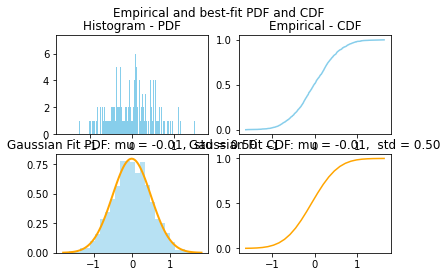

In [8]:
#Plot all together for comparison
fig, axs = plt.subplots(2, 2)
plt.rcParams['figure.figsize'] = [10, 10] #[width height] #set figure size
fig.suptitle('Empirical and best-fit PDF and CDF')

#plot empirical

axs[0,0].hist(data, color='skyblue', bins=len(data))
axs[0,0].set_title('Histogram - PDF')
axs[0,1].plot(ecdf.x,ecdf.y, color='skyblue')
axs[0,1].set_title('Empirical - CDF')

#plot fitted

# Plot the histogram
n, bins, patches =axs[1,0].hist(data, bins=25, density=True, alpha=0.6, color='skyblue')
# Plot the PDF.
xmin, xmax = axs[1,0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
axs[1,0].plot(x, p, 'orange', linewidth=2)
title = "Gaussian Fit PDF: mu = %.2f,  std = %.2f" % (mu, std)
axs[1,0].set_title(title)


# plot the CDF
# Add a line showing the expected distribution.
y = ((1 / (np.sqrt(2 * np.pi) * std)) *
     np.exp(-0.5 * (1 / std * (bins - mu))**2))
y = y.cumsum()
y /= y[-1]

axs[1,1].plot(bins, y, 'orange', linewidth=1.5,)
title = "Gaussian Fit CDF: mu = %.2f,  std = %.2f" % (mu, std)
axs[1,1].set_title(title)

### Study Skewness and Kurtosis
Skewness measures the "lack of simmetry". It is calculated as: $skewness=\frac{1}{N}\frac{\sum_i^N (Y_i - \overline Y)^3}{s^3}$ 

Differently, Kurtosis measures the "tailedness" of a distribution. It is calculated as: $kurtosis=\frac{1}{N}\frac{\sum_i^N (Y_i - \overline Y)^4 / N}{s^4}$ 


In [9]:
#Generate Lognormal Distributions using shape factors
from scipy.stats import lognorm

# Define different shape factors for the distribution
s1 = 1
s2 = 0.5
s3 = 0.25
s4=0.1
s5=0.01
s6=0.001

mean1, var1, skew1, kurt1 = lognorm.stats(s1, moments='mvsk')
x1 = np.linspace(lognorm.ppf(0.01, s1),lognorm.ppf(0.99, s1), 100)

mean2, var2, skew2, kurt2 = lognorm.stats(s2, moments='mvsk')
x2 = np.linspace(lognorm.ppf(0.01, s2),lognorm.ppf(0.99, s2), 100)

mean3, var3, skew3, kurt3 = lognorm.stats(s3, moments='mvsk')
x3 = np.linspace(lognorm.ppf(0.01, s3),lognorm.ppf(0.99, s3), 100)

mean4, var4, skew4, kurt4 = lognorm.stats(s4, moments='mvsk')
x4 = np.linspace(lognorm.ppf(0.01, s4),lognorm.ppf(0.99, s4), 100)

mean5, var5, skew5, kurt5 = lognorm.stats(s5, moments='mvsk')
x5 = np.linspace(lognorm.ppf(0.01, s5),lognorm.ppf(0.99, s5), 100)

mean6, var6, skew6, kurt6 = lognorm.stats(s6, moments='mvsk')
x6 = np.linspace(lognorm.ppf(0.01, s6),lognorm.ppf(0.99, s6), 100)

Text(0.5, 1.0, 'Lognormal with mean= 1.00, var= 0.00, skewness= 0.00 kurtosis= 0.00')

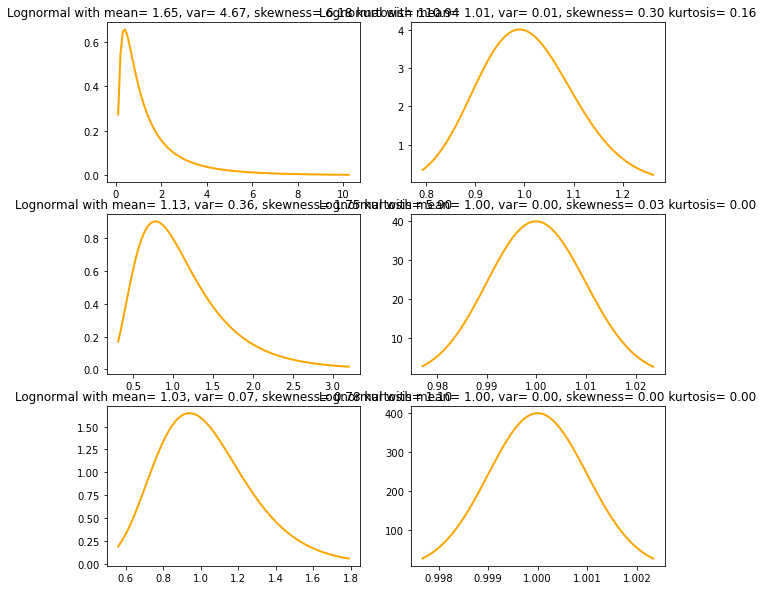

In [10]:
#plot all the distributions
fig, axs = plt.subplots(3,2)
plt.rcParams['figure.figsize'] = [30, 25] #[width height] #set figure size
axs[0,0].plot(x1, lognorm.pdf(x1, s1), 'orange', linewidth=2)
axs[0,0].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean1, var1, skew1, kurt1))
axs[1,0].plot(x2, lognorm.pdf(x2, s2), 'orange', linewidth=2)
axs[1,0].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean2, var2, skew2, kurt2))
axs[2,0].plot(x3, lognorm.pdf(x3, s3), 'orange', linewidth=2)
axs[2,0].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean3, var3, skew3, kurt3))
axs[0,1].plot(x4, lognorm.pdf(x4, s4), 'orange', linewidth=2)
axs[0,1].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean4, var4, skew4, kurt4 ))
axs[1,1].plot(x5, lognorm.pdf(x5, s5), 'orange', linewidth=2)
axs[1,1].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean5, var5, skew5, kurt5 ))
axs[2,1].plot(x6, lognorm.pdf(x6, s6), 'orange', linewidth=2)
axs[2,1].set_title('Lognormal with mean= %.2f, var= %.2f, skewness= %.2f kurtosis= %.2f' % (mean6, var6, skew6, kurt6 ))


### Study correlation
The correlation is used to check whether a couple of variables has a simila patterns, i.e. they tend to vary the same way.

In [11]:
# load the iris sample dataset
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
df=pd.DataFrame(iris.data)
df['y']=iris.target
df.columns=['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid','y']
df.head() #print the first five rows

,sepal_len,sepal_wid,petal_len,petal_wid,y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


C:\Users\aletu\.conda\envs\analogistics2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


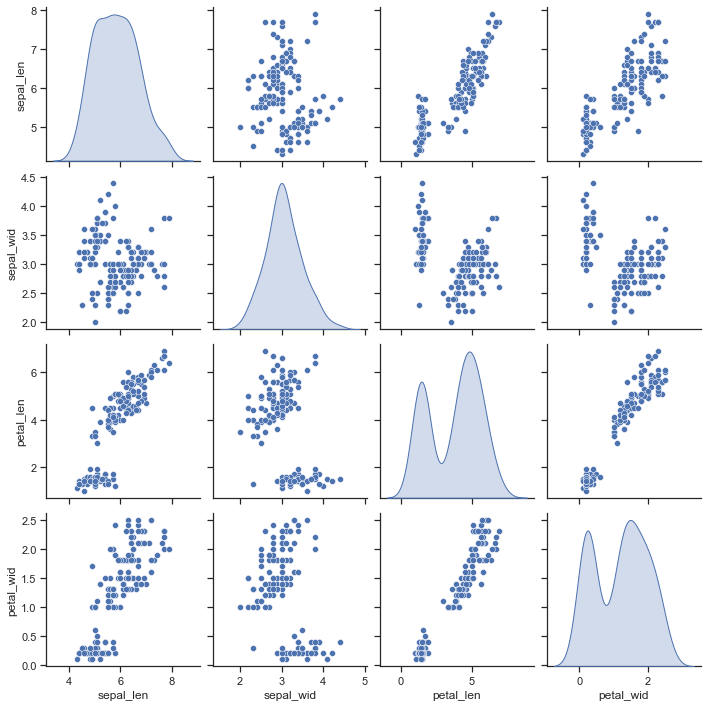

In [12]:
#Extract the input variables and visualise their correlation
import seaborn as sns
df_input=df[['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid']]

#data cleaning
df_input.dropna(how="all", inplace=True) 

sns.set(style="ticks", color_codes=True)
fig=sns.pairplot(df_input,diag_kind="kde",markers="o")

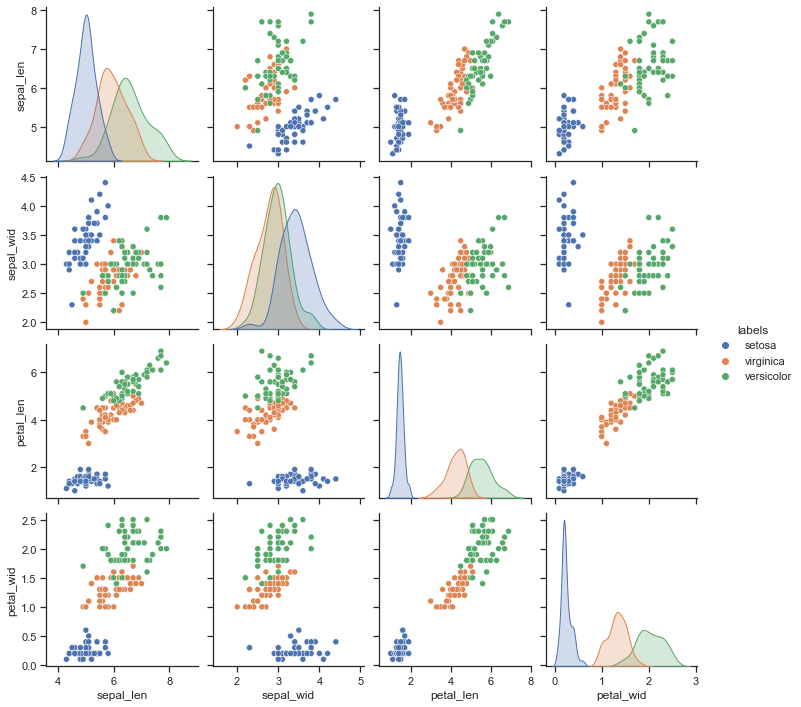

In [13]:
#Visualise correlation between input variables with target labels

#update labels using strings
dict_labels={0:'setosa',1:'virginica',2:'versicolor'}
df['labels'] = [dict_labels[i] for i in df['y']]
df=df.drop(columns=['y'])
#data cleaning
df.dropna(how="all", inplace=True) 

sns.set(style="ticks", color_codes=True)
fig=sns.pairplot(df,diag_kind="kde",markers="o",hue='labels')